In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd()

'C:\\Users\\DeLL\\AI'

In [3]:
df = pd.read_csv('C:/Users/DeLL/AI/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
df['A']= df[['Annual Income (k$)']]
df['B']= df[['Spending Score (1-100)']]

In [7]:
req_df = df[['A','B']]

In [8]:
ss= StandardScaler()

In [9]:
req_df_std= ss.fit_transform(req_df)

In [10]:
Errors = []

for i in range(1, len(req_df)):
    
    kmeans= KMeans(n_clusters= i)
    kmeans.fit(req_df_std)
    Errors.append(kmeans.inertia_)

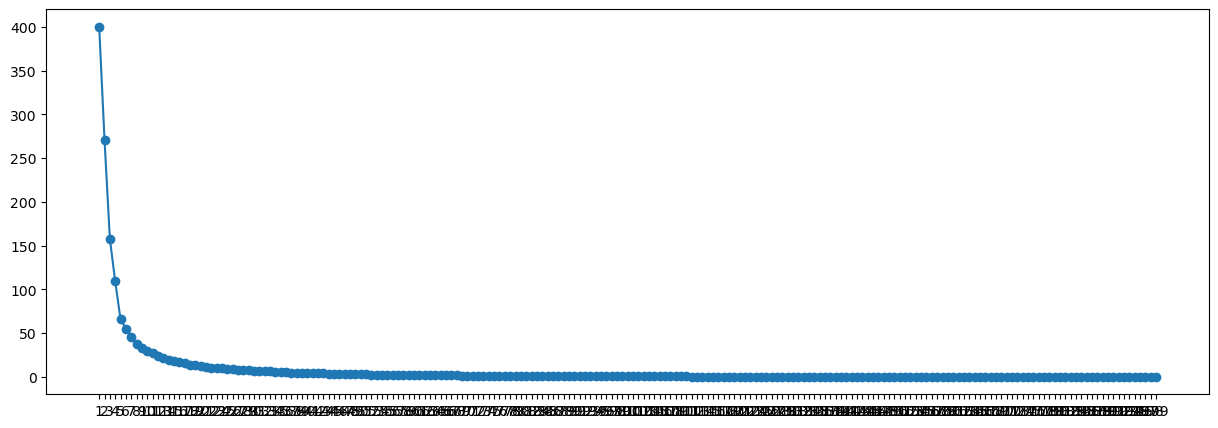

In [14]:
plt.figure(figsize= (15,5))
plt.plot(range(1, len(req_df)), Errors, marker='o')
plt.xticks(range(1, len(req_df)))
plt.show()

In [15]:
#Kmeans Clustering Algorithm

kmeans= KMeans(n_clusters= 5)
df['cluster_membership'] = kmeans.fit_predict(req_df_std)

In [17]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,cluster_membership
0,1,Male,19,15,39,15,39,4
1,2,Male,21,15,81,15,81,0
2,3,Female,20,16,6,16,6,4
3,4,Female,23,16,77,16,77,0
4,5,Female,31,17,40,17,40,4


In [19]:
cluster_centers = kmeans.cluster_centers_

In [21]:
cluster_centers_original = ss.inverse_transform(cluster_centers)

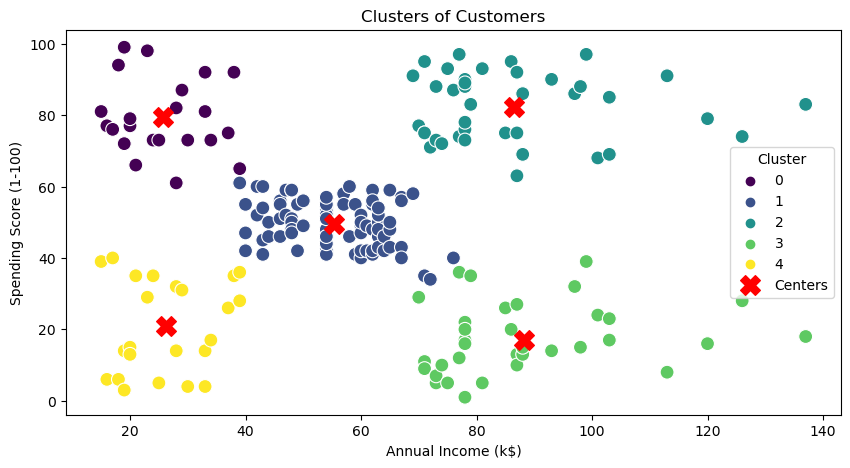

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='A', y='B', hue='cluster_membership', data=df, palette='viridis', s=100)
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], c='red', s=200, marker = 'X', label='Centers')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()